In [31]:
import drawsvg as draw
import math
import time
import numpy as np
import os

In [32]:
p=[80,80]
testSegments=[[[20,140],[80,120]],
                  [[80,120],[100,160]],
                  [[100,160],[100,20]],
                  [[100,20],[60,40]],
                  [[60,40],[20,140]],
                  [[60,40],[80,120]]
                 ]
sydneySegments=[[[34, 58], [34, 154]],
                [[34, 154], [98, 210]],
                [[10, 210], [98, 210]],
                [[98, 210], [170, 242]],
                [[170, 242], [186, 258]],
                [[186, 258], [218, 290]],
                [[186, 258], [138, 362]],
                [[138, 362], [138, 442]],
                [[34, 458], [138, 442]],
                [[138, 442], [138, 562]],
                [[138, 362], [218, 362]],
                [[218, 290], [218, 362]],
                [[218, 362], [290, 362]],
                [[218, 290], [258, 290]],
                [[290, 362], [378, 322]],
                [[258, 290], [402, 290]],
                [[378, 322], [402, 290]],
                [[138, 442], [258, 442]],
                [[258, 442], [354, 346]],
                [[354, 346], [378, 322]],
                [[378, 322], [378, 346]],
                [[378, 346], [378, 522]],
                [[378, 522], [474, 522]],
                [[378, 522], [378, 570]],
                [[66, 146], [258, 146]],
                [[258, 146], [258, 290]],
                [[258, 146], [258, 66]],
                [[258, 66], [258, 10]],
                [[258, 66], [354, 162]],
                [[258, 146], [354, 162]],
                [[354, 162], [402, 234]],
                [[354, 346], [378, 346]],
                [[378, 346], [402, 346]],
                [[402, 346], [402, 290]],
                [[402, 290], [402, 274]],
                [[402, 274], [402, 258]],
                [[402, 258], [402, 234]],
                [[402, 234], [450, 234]],
                [[450, 234], [450, 274]],
                [[450, 274], [402, 274]],
                [[402, 258], [482, 258]]
               ]
sydney_bezierPath=[[114,234],
                 [114,346],
                 [354,346],
                 [354,218],
                 [434,202]]

sydney_polylinePath=[[258,10],
                [258,290],
                [402,290],
                [378,322],
                [378,522]]

viennaSegments=[[[10, 424], [130, 344]],
                [[130, 344], [130, 288]],
                [[130, 288], [26, 288]],
                [[26, 288], [66, 184]],
                [[66, 184], [178, 96]],
                [[178, 96], [226, 120]],
                [[226, 120], [178, 128]],
                [[178, 96], [178, 128]],
                [[178, 128], [130, 240]],
                [[66, 184], [130, 240]],
                [[130, 240], [130, 288]],
                [[226, 120], [266, 80]],
                [[226, 120], [274, 184]],
                [[178, 128], [226, 184]],
                [[130, 240], [178, 240]],
                [[130, 288], [226, 288]],
                [[130, 344], [226, 344]],
                [[274, 184], [226, 184]],
                [[226, 184], [178, 240]],
                [[178, 240], [226, 288]],
                [[226, 288], [226, 344]],
                [[226, 344], [298, 424]],
                [[274, 184], [250, 208]],
                [[250, 208], [226, 240]],
                [[226, 240], [226, 288]],
                [[226, 184], [250, 208]],
                [[178, 240], [226, 240]],
                [[274, 184], [274, 240]],
                [[250, 208], [274, 240]],
                [[226, 240], [274, 240]],
                [[226, 288], [274, 240]],
                [[274, 240], [274, 312]],
                [[274, 312], [226, 344]],
                [[274, 184], [378, 80]],
                [[274, 184], [402, 208]],
                [[402, 208], [490, 208]],
                [[274, 240], [338, 344]]
               ]
vienna_bezierPath=[[106,312],
                  [250,312],
                  [250,184],
                  [298,200],]
vienna_polylinePath=[[266,80],
                [226,120],
                [178,128],
                [130,240],
                [274,240],
                [338,344],]

In [33]:
originalSegments=viennaSegments

In [34]:
color = 'grey'
stationcolor= 'black'
line_width = 5

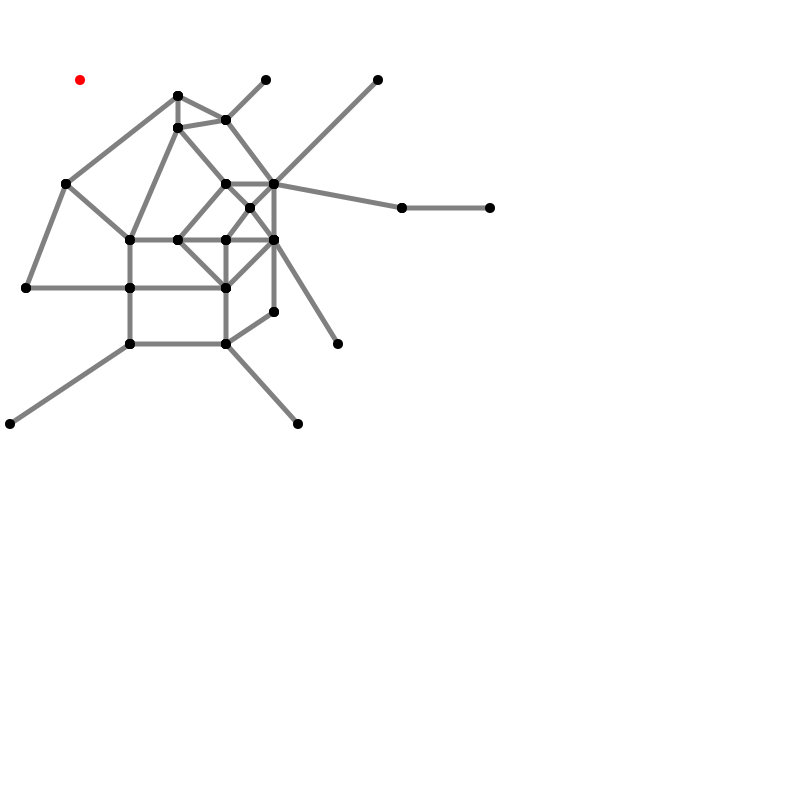

In [35]:
d = draw.Drawing(800, 800, origin=(0,0))
#draw segments
for s in originalSegments:
    startx=s[0][0]
    starty=s[0][1]
    endx=s[1][0]
    endy=s[1][1]
    
    d.append(draw.Line(startx,starty,endx,endy, stroke=color, stroke_width=line_width))
    #additionally for bends
    d.append(draw.Circle(startx, starty, line_width, fill=stationcolor, stroke='none'))
    d.append(draw.Circle(endx, endy, line_width, fill=stationcolor, stroke='none'))

d.append(draw.Circle(p[0], p[1], line_width, fill='red', stroke='none'))
#d.save_svg('sydney.svg')
d

In [36]:
def magnitude(vector):
    m=0
    for i in vector:
        m += i**2
    m = math.sqrt(m)
    return m

##choose compression algorithm here
def compression(magnitude):
    base = 1.1
    newmagnitude= math.log(magnitude,base)
    return newmagnitude

##vector1+vector2 elementwise
def vectoradd(vector1,vector2):
    return [vector1[0]+vector2[0],vector1[1]+vector2[1]]

##vector1-vector2 elementwise
def vectorsub(vector1,vector2):
    return [vector1[0]-vector2[0],vector1[1]-vector2[1]]

##vector*a elementwise
def vectormult(vector,a):
    return [vector[0]*a,vector[1]*a]

##get angle between vector1 and vector2
def vectorang(vector1,vector2):
    vector1unit= vectormult(vector1,1/magnitude(vector1))
    vector2unit= vectormult(vector2,1/magnitude(vector2))
    dot_product= np.dot(vector1unit,vector2unit)
    dot_product=min(1,dot_product)
    dot_product=max(-1,dot_product)
    ###ERROR this throws errors sometimes, when exporting
    angle = np.arccos(dot_product)
    return angle
    
def fisheye(point,observer):
    #keep angle of the point to position but change distance
    vector = vectorsub(point,observer) #vector from position to point
    mag = magnitude(vector)
    newmagnitude = compression(mag)
    factor = newmagnitude/mag
    newvector = vectormult(vector,factor)
    newpoint = vectoradd(observer, newvector)
    return newpoint
    

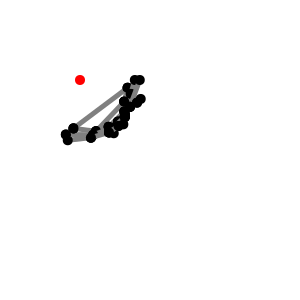

In [37]:
d = draw.Drawing(300, 300, origin=(0,0))
#draw segments
for s in originalSegments:
    point1=fisheye(s[0],p)
    point2=fisheye(s[1],p)
    startx=point1[0]
    starty=point1[1]
    endx=point2[0]
    endy=point2[1]
    
    d.append(draw.Line(startx,starty,endx,endy, stroke=color, stroke_width=line_width))
    #additionally for bends
    d.append(draw.Circle(startx, starty, line_width, fill=stationcolor, stroke='none'))
    d.append(draw.Circle(endx, endy, line_width, fill=stationcolor, stroke='none'))

d.append(draw.Circle(p[0], p[1], line_width, fill='red', stroke='none'))
#d.save_svg('fisheye-rect-morph.svg')
d

In [38]:
# Decide whether to have a horizontal or vertical step in uniform strategy
# True starts with horizontal segments, False with vertical
def steporientation(r1,r2,angle):
    circumdif = (r1+r2)/2*angle #sum of length of horizontal segments
    rdif = abs(r1-r2) #length of vertical segment
    return circumdif>rdif

In [39]:
# use s steporientation() to figure out the step orientation
# Draw a frame of the animation
def draw_frame_uniformSteps(observer,onlyCirc=False, onlySpoke=False, epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal
    
    for s in originalSegments:
        #fisheye commented, decomment if it should be stretched
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        segment=s
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi))
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        segmentOrientation.append(clockwise)
        #decide whether to start with a horizontal or vertical step
        circular=steporientation(r1,r2,angdiff)
        if onlyCirc:
            circular = True
        if onlySpoke:
            circular = False
        
        if angdiff>(math.pi-epsilon): #degenerate case
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            continue
        
        if circular: #horizontal step
            segmentStyle.append('h')
            anghalf = (ang1+ang2)/2
            if not clockwise:
                anghalf += math.pi 
            if ang2<ang1:
                anghalf += math.pi
            anghalf = anghalf%(2*math.pi)
            #first half
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180), (anghalf/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,anghalf,r1])
                crossingSegments[1].append([anghalf,ang2,r2])
            else:
                crossingSegments[1].append([anghalf,ang1,r1])
                crossingSegments[1].append([ang2,anghalf,r2])
            
            #spoke segment
            #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
            x_v = r1*math.cos(anghalf) + o[0]
            y_v = r1*math.sin(anghalf) + o[1]
            x_w = r2*math.cos(anghalf) + o[0]
            y_w = r2*math.sin(anghalf) + o[1]
            
            d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([anghalf,min(r1,r2),max(r1,r2)])
            
            #to make bends smooth
            d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
            d.append(draw.Circle(x_w, y_w, line_width/2, fill=color, stroke='none'))
            #second half
            d.append(draw.Arc(o[0], o[1], r2, (anghalf/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
        else: #vertical step
            segmentStyle.append('v')
            rhalf = (r1+r2)/2
            #first half
            halfvector1 = vectormult(vector1,((r1+r2)/2)/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,min(r1,rhalf),max(r1,rhalf)])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector1[0]+o[0],halfvector1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
            
            #horizontal segment
            d.append(draw.Arc(o[0], o[1], rhalf, (ang1/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rhalf])
            else:
                crossingSegments[1].append([ang2,ang1,rhalf])
            
            #second half
            halfvector2 = vectormult(vector2,((r1+r2)/2)/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,min(r2,rhalf),max(r2,rhalf)])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector2[0]+o[0],halfvector2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
    
    d.append(draw.Circle(500, 500, line_width, fill='red', stroke='none'))
    #d.append(draw.Circle(observer[0], observer[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle


In [60]:
# use s steporientation() to figure out the step orientation
# Draw a frame of the animation
def draw_frame_LSteps(observer, epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal, 'x' for none
    
    for s in originalSegments:
        #fisheye commented, decomment if it should be stretched
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        segment=s
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi))
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        segmentOrientation.append(clockwise)
        #decide whether to start with a horizontal or vertical step
        circular= r1<r2 ##we always draw the circular segment at the closer to center vertex, such that the distance is minimized
        
        if angdiff>(math.pi-epsilon): #degenerate case, sls goes through the center point
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            continue
        
        if circular: #horizontal step
            segmentStyle.append('x') #note that there are no style flips the way we decided on the L orientation
            #first half
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,r1])
            else:
                crossingSegments[1].append([ang2,ang1,r1])
            
            #spoke segment
            #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
            x_v = r1*math.cos(ang2) + o[0]
            y_v = r1*math.sin(ang2) + o[1]
            x_w = vector2[0] + o[0]
            y_w = vector2[1] + o[1]
            
            d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,min(r1,r2),max(r1,r2)])
            
            #to make bends smooth
            d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
            
        else: #vertical step
            segmentStyle.append('x') #still, there shouldn't be styleflips
            #vertical segment
            x_v = r2*math.cos(ang1) + o[0]
            y_v = r2*math.sin(ang1) + o[1]
            
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               x_v,y_v, 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,min(r1,r2),max(r1,r2)])
            
            #to make bends smooth
            d.append(draw.Circle( x_v, y_v, 
                                 line_width/2, fill=color, stroke='none'))
            
            #horizontal segment
            d.append(draw.Arc(o[0], o[1], r2, (ang1/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,r2])
            else:
                crossingSegments[1].append([ang2,ang1,r2])
            
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
    
    d.append(draw.Circle(500, 500, line_width, fill='red', stroke='none'))
    #d.append(draw.Circle(observer[0], observer[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle

In [41]:
def getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2): ##assuming clockwise order and r1<=r2 otherwise flip them at function call!
    #returns r which is the radius of the circular horizontal part and the hausdorffdistance
    #euclidean coordinates of s1 and s2:
    x_1 = r1*math.cos(ang1)
    y_1 = r1*math.sin(ang1)
    x_2 = r2*math.cos(ang2)
    y_2 = r2*math.sin(ang2)
    angdiff = (ang2-ang1)%(2*math.pi)
    outang1 = vectorang([x_2-x_1,y_2-y_1],[-1*x_1,-1*y_1])#angle between segment and spike (cw) at s1
    inang2 = math.pi-angdiff-outang1 #angle between spike and segment (cw) at s2, forms a triangle, so we can use this knowledge
    if ang1 == ang2: #straight line, we have to catch that not to divide by 0
        hausdorff = 0
        r = r1
        return r,hausdorff
    
    if outang1>math.pi/2: #if the segment is more than 90°, the u-shape does not make sense, so we make a step instead.
        ##step-shape starting and ending with straights with a curve in the middle
        r=((r1*math.sin(math.pi-outang1))+(r2*math.sin(inang2)))/(math.sin(inang2)+math.sin(math.pi-outang1))
        hausdorff = math.sin(inang2)*(r2-r)
        return r,hausdorff
    else:
        ##u-shape or bucket
        difSegmentO = pointLineDistance(0,0,[[x_1,y_1],[x_2,y_2]]) #distance between the segment and the observer
        r = (difSegmentO+(math.sin(inang2)*r2))/(1+math.sin(inang2)) #optimally the circular segment is as far of the line as the second bendpoint is
        #the first bendpoint can be ignored, since r1<=r2. the distance of the circular segment is given by r-difSegmentO
        hausdorff = r-difSegmentO
        hausdorffcheckS1 = math.sin(outang1)*(r1-r)
        hausdorffcheckS2 = math.sin(inang2)*(r2-r)
        hausdorffcheckCirc = r-difSegmentO
        return r,hausdorff
        

In [42]:
def getCircHausdorffStepSize(observer,r1,ang1,r2,ang2): ##assuming clockwise order and r1<=r2 otherwise flip them at function call!
    #returns ang which is the angle of the vertical step and the hausdorffdistance
    #euclidean coordinates of s1 and s2:
    x_1 = r1*math.cos(ang1)
    y_1 = r1*math.sin(ang1)
    x_2 = r2*math.cos(ang2)
    y_2 = r2*math.sin(ang2)
    angdiff = (ang2-ang1)%(2*math.pi)
    outang1 = vectorang([x_2-x_1,y_2-y_1],[-1*x_1,-1*y_1])#angle between segment and spike (cw) at s1
    inang2 = math.pi-angdiff-outang1
    rhalf = (r1+r2)/2
    
    cutang = math.asin((r1/rhalf)*math.sin(outang1))
    ang= ((math.pi-cutang-outang1)%(2*math.pi)+ang1)%(2*math.pi)
    hausdorff = math.sin(cutang)*(rhalf-r1)
    
    hausdorffcheckR1 = math.sin(cutang)*(r2-rhalf)
    hausdorffcheckR2 = math.sin(cutang)*(rhalf-r1)
    hausdorffcheckCirc = 0
    if outang1<math.pi/2: #this is a slightly stranger version, where the first circular arc intersects the original arc
        #thus we might have to adjust the hausdorff distance, since this first arc has an extremepoint at its peak
        difSegmentO = pointLineDistance(0,0,[[x_1,y_1],[x_2,y_2]]) #distance between the segment and the observer
        distanceCircToSegment = r1-difSegmentO
        hausdorff = max(hausdorff,distanceCircToSegment)
        
        hausdorffcheckCirc = r1-difSegmentO
    return ang,hausdorff
          
    

In [43]:
# draw while minimizing the hausdorff-distance
# Draw a frame of the animation
def draw_frame_hausdorffSteps(observer,oldSegmentStyle=[],onlySpoke=False,onlyCirc=False,epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal
    
    i=0
    for s in originalSegments:
        #without fisheye, else uncomment
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        
        segment = s
        
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if angdiff>(math.pi-epsilon): #degenerate case
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentOrientation.append(True)
            segmentStyle.append('x')
            continue
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        
        segmentOrientation.append(clockwise)
        
        if r1>r2: #for simplicity invert the segment in case r1>r2
            vector1,vector2 = vector2,vector1
            ang1,ang2 = ang2,ang1
            r1,r2 = r2,r1
            clockwise = not clockwise
        
        if clockwise:
            rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2)
            angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,ang1,r2,ang2)
        else: #flip the angles, such that we have the mirror problem
            rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
            angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
            angHoriz = (-1*angHoriz)%(2*math.pi)
        
        circular = hausdorffHoriz<hausdorffVert
        if (abs(hausdorffHoriz-hausdorffVert)<epsilon) and (len(oldSegmentStyle)>0):#avoid flicking, only change the style, when there is actual benefit
            circular = (oldSegmentStyle[i]=='h')
        
        if(onlyCirc or(circular and not onlySpoke)):
            segmentStyle.append('h')
            ###do horizontal step
            #first half
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180)%360, (angHoriz/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,angHoriz,r1])
            else:
                crossingSegments[1].append([angHoriz,ang1,r1])
            
            #vertical segment
            #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
            x_v = r1*math.cos(angHoriz) + o[0]
            y_v = r1*math.sin(angHoriz) + o[1]
            x_w = r2*math.cos(angHoriz) + o[0]
            y_w = r2*math.sin(angHoriz) + o[1]

            d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([angHoriz,r1,r2])
            
            #to make bends smooth
            d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
            d.append(draw.Circle(x_w, y_w, line_width/2, fill=color, stroke='none'))
            #second half
            d.append(draw.Arc(o[0], o[1], r2, (angHoriz/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([angHoriz,ang2,r2])
            else:
                crossingSegments[1].append([ang2,angHoriz,r2])
        
        else: 
            ###do vertical step (including u-shape)
            segmentStyle.append('v')
            #first half
            halfvector1 = vectormult(vector1,rVert/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,r1,rVert])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector1[0]+o[0],halfvector1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))

            #horizontal segment
            d.append(draw.Arc(o[0], o[1], rVert, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rVert])
            else:
                crossingSegments[1].append([ang2,ang1,rVert])

            #second half
            halfvector2 = vectormult(vector2,rVert/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,rVert,r2])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector2[0]+o[0],halfvector2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        i+=1
        
        ##DEBUG
        #d.append(draw.Line(segment[0][0],segment[0][1],segment[1][0],segment[1][1],stroke="red", stroke_width=1))
        
    d.append(draw.Circle(o[0], o[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle

In [44]:
###### OCTORADIAL

In [45]:
def drawSpiral(d,o,rstart,rend,ang,cw=True): #drawing, center, start radius inner, end radius outer, start angle in radian, clockwise
    approxscale=1
    a=(rstart/math.e**ang) #ang should be in radian
    r=rstart
    while r<rend:
        #draw line from r to r+approxscale
        r_v=r
        r_w=r+approxscale
        ang_v=math.log(r_v/a)
        ang_w=math.log(r_w/a)
        if not cw:
            ang_v=math.log(a/r_v)
            ang_w=math.log(a/r_w)
        x_v=r_v*math.cos(ang_v) + o[0]
        y_v=r_v*math.sin(ang_v) + o[1]
        x_w=r_w*math.cos(ang_w) + o[0]
        y_w=r_w*math.sin(ang_w) + o[1]
        #approximated segment
        d.append(draw.Line(x_v, y_v, x_w, y_w, stroke=color, stroke_width=line_width))
        #to make bends smooth
        d.append(draw.Circle(x_v,y_v,line_width/2, fill=color, stroke='none'))
        d.append(draw.Circle(x_w,y_w,line_width/2, fill=color, stroke='none'))
        r += approxscale
    return

In [46]:
#return true if the segment is more horizontal than the log spiral, false if it is steeper/vertical
def stepOrientationOcto(r1,r2,angle,k=1):
    k=abs(k)
    a=1 #should not matter, since we're not interested in correct angles
    ang1=math.log(r1/a)
    ang2=math.log(r2/a)
    horizontal=ang2-ang1<angle
    return horizontal

In [47]:
#assuming we are in the vertical case, this gives where to start,end the spiral such that the vert. segments are split in half
def startRadiusSpiral(r1,r2,ang,k=1):
    k=abs(k) #we are only looking at clockwise cases
    a=1 #should not matter, since we're not interested in correct angles
    angstart=(1/k)*math.log(r1/a)
    rspiral=(a*math.e**(k*(angstart+ang)))-r1 #length of the shortest possible spiral segment, starting right at r1
    rstartopt=(r1*(r1+r2))/(2*r1+rspiral) # gives the radius of where to start the spiral, s.t. the split is symmetrical
    rendopt=(rstartopt/r1)*(r1+rspiral)
    return rstartopt,rendopt
    

In [48]:
# use s steporientation() to figure out the step orientation
# Draw a frame of the animation
def draw_frame_octoradialSteps(observer,angle=1,epsilon=0.001): #angle 1 is 45° angle (=tan(α))
    
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal
    
    #CONSTANTS:
    approxscale=1


    #DRAWING
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    for s in originalSegments:
        k=angle
        #without fisheye, else uncomment
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        
        segment = s
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        
        segmentOrientation.append(clockwise)
        
        #make sure that vector1 is closer to the center for easier processing, otherwise flip the orientation of the segment
        if r2<r1:
            clockwise = not clockwise
            vector1,vector2 = vector2,vector1
            r1,r2 = r2,r1
            ang1,ang2 = ang2,ang1
            
        if angdiff>(math.pi-epsilon): #degenerate case where observer is on a segment
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            continue
            
        if not clockwise:
            k = -angle #inversing the angle
        #decide whether to start with a horizontal or vertical line
        horizontal=stepOrientationOcto(r1,r2,angdiff,k)

        if horizontal: #HORIZONTAL STEP
            segmentStyle.append('h')
            spiralang1=(1/k)*math.log(r1)#only relative
            spiralang2=(1/k)*math.log(r2)#only relative
            angleft= angdiff-abs(spiralang2-spiralang1)#the angle spanned by horizontal segments
            #print(f'angdiff: {angdiff/math.pi*180}, spiral: {abs(spiralang1-spiralang2)/math.pi*180}, rest: angle: {angleft/math.pi*180}')
            if clockwise:
                anghoriz1=ang1+angleft/2
                anghoriz2=ang2-angleft/2
            else:
                anghoriz1=ang1-angleft/2
                anghoriz2=ang2+angleft/2

            #first horizontal segment
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180), (anghoriz1/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            if clockwise:
                crossingSegments[1].append([ang1,anghoriz1,r1])
            else:
                crossingSegments[1].append([anghoriz1,ang1,r1])
            
            #spiral segment
            a=(r1/math.e**(k*anghoriz1))
            r=r1
            while r<=r2-(approxscale/2):
                #draw line from r to r+approxscale
                r_v=r
                r_w=r+approxscale
                ang_v=(1/k)*math.log(r_v/a)
                ang_w=(1/k)*math.log(r_w/a)
                x_v=r_v*math.cos(ang_v) + o[0]
                y_v=r_v*math.sin(ang_v) + o[1]
                x_w=r_w*math.cos(ang_w) + o[0]
                y_w=r_w*math.sin(ang_w) + o[1]
                #approximated segment
                d.append(draw.Line(x_v, y_v, x_w, y_w, stroke=color, stroke_width=line_width))
                #to make bends smooth
                d.append(draw.Circle(x_v,y_v,line_width/2, fill=color, stroke='none'))
                d.append(draw.Circle(x_w,y_w,line_width/2, fill=color, stroke='none'))
                r += approxscale
            
            if clockwise:
                crossingSegments[2].append([anghoriz1,anghoriz2,r1,r2,a,k])
            else:
                crossingSegments[2].append([anghoriz2,anghoriz1,r1,r2,a,k])

            #second horizontal segment
            d.append(draw.Arc(o[0], o[1], r2, (anghoriz2/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            if clockwise:
                crossingSegments[1].append([anghoriz2,ang2,r2])
            else:
                crossingSegments[1].append([ang2,anghoriz2,r2])

        else: #VERTICAL STEP
            segmentStyle.append('v')
            rstartspiral,rendspiral=startRadiusSpiral(r1,r2,angdiff,k)

            #first vertical segment
            halfvector1 = vectormult(vector1,rstartspiral/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,r1,rstartspiral])
            
            #spiral segment
            a=(rstartspiral/math.e**(k*ang1))
            r=rstartspiral
            while r<rendspiral-(approxscale/2): #are we significantly close to the spiral end?
                r_v=r
                r_w=r+approxscale
                ang_v=(1/k)*math.log(r_v/a)
                ang_w=(1/k)*math.log(r_w/a)
                x_v=r_v*math.cos(ang_v) + o[0]
                y_v=r_v*math.sin(ang_v) + o[1]
                x_w=r_w*math.cos(ang_w) + o[0]
                y_w=r_w*math.sin(ang_w) + o[1]
                #approximated segment
                d.append(draw.Line(x_v, y_v, x_w, y_w, stroke=color, stroke_width=line_width))
                #to make bends smooth
                d.append(draw.Circle(x_v,y_v,line_width/2, fill=color, stroke='none'))
                d.append(draw.Circle(x_w,y_w,line_width/2, fill=color, stroke='none'))
                r += approxscale
                
            if clockwise:
                crossingSegments[2].append([ang1,ang2,rstartspiral,rendspiral,a,k])
            else:
                crossingSegments[2].append([ang2,ang1,rstartspiral,rendspiral,a,k])

            #second vertical segment
            rendspiral=r #this is where the approx ended, if it is askew we need to change this but might risk a gap
            halfvector2 = vectormult(vector2,rendspiral/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,rendspiral,r2])

        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
    d.append(draw.Circle(o[0], o[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle



In [49]:
#### PORT BY ANGLE
def draw_frame_portByAngleSteps(observer,rLimit=10,epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal, 'l' for L-shape, 'c' for concentric
    
    for s in originalSegments:
        #without fisheye, else uncomment
        #segment=[fisheye(s[0],observer),fisheye(s[1],observer)]
        
        segment = s
        
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if angdiff>(math.pi-epsilon): #degenerate case
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            segmentOrientation.append(True)
            continue
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0], segment[0][1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0], segment[1][1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        
        segmentOrientation.append(clockwise)
        
        if r1>r2: #for simplicity invert the segment in case r1>r2
            vector1,vector2 = vector2,vector1
            ang1,ang2 = ang2,ang1
            r1,r2 = r2,r1
            clockwise = not clockwise
        
        if not clockwise: #mirror the problem, be sure to reverse mirror this before drawing
            ang1 = (-1*ang1)%(2*math.pi)
            ang2 = (-1*ang2)%(2*math.pi)
            
        angdiff = (ang2-ang1)%(2*math.pi)
        outang1 = vectorang(vectorsub(vector2,vector1),vectormult(vector1,-1))#angle between segment and spike (cw) at s1
        inang2 = math.pi-angdiff-outang1
        
        ##we have to handle four cases:
        
        ## s1 bottom port -> s2 bottom port : go up to the innercircle
        if outang1 < math.pi/4:
            segmentStyle.append('c')
            if not clockwise:
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)
            #vertical segment
            vectorBend1 = vectormult(vector1,(rLimit/r1))
            vectorBend2 = vectormult(vector2,(rLimit/r2))
            d.append(draw.Line(vectorBend1[0]+o[0],vectorBend1[1]+o[1],
                               vector1[0]+o[0],vector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,min(rLimit,r1),max(rLimit,r1)])
            
            d.append(draw.Line(vectorBend2[0]+o[0],vectorBend2[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,min(rLimit,r2),max(rLimit,r2)])
            
            #to make bends smooth
            d.append(draw.Circle(vectorBend1[0]+o[0],vectorBend1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
            d.append(draw.Circle(vectorBend2[0]+o[0],vectorBend2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
            #circular segment
            d.append(draw.Arc(o[0], o[1], rLimit, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                    stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rLimit])
            else:
                crossingSegments[1].append([ang2,ang1,rLimit])
            
            
        ## s1 right port, two options
        elif outang1 <= 3*math.pi/4:
                
                ## s1 right port, s2 bottom port, make an l step
                if inang2 <math.pi/4:
                    segmentStyle.append('l')
                    if not clockwise:
                        ang1 = (-1*ang1)%(2*math.pi)
                        ang2 = (-1*ang2)%(2*math.pi)
                    #horizontal segment
                    d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                    stroke=color, stroke_width=line_width, fill='none'))
                    if clockwise:
                        crossingSegments[1].append([ang1,ang2,r1])
                    else:
                        crossingSegments[1].append([ang2,ang1,r1])
                    #vertical segment
                    vectorBend = vectormult(vector2,(r1/r2)) #making vector 2 as long as vector 1
                    d.append(draw.Line(vectorBend[0]+o[0],vectorBend[1]+o[1],
                                       vector2[0]+o[0],vector2[1]+o[1],
                                       stroke=color, stroke_width=line_width))
                    crossingSegments[0].append([ang2,r1,r2])
                    
                    #to make the bend smooth
                    d.append(draw.Circle(vectorBend[0]+o[0],vectorBend[1]+o[1], 
                                         line_width/2, fill=color, stroke='none'))
                    
                ## s1 right port, s2 left port, make a horizontal Hausdorff step
                else:
                    segmentStyle.append('h')
                    rhalf = (r1+r2)/2
                    cutang = math.asin((r1/rhalf)*math.sin(outang1))
                    angHoriz= ((math.pi-cutang-outang1)%(2*math.pi)+ang1)%(2*math.pi)
                    hausdorff = math.sin(cutang)*(rhalf-r1) ##not used yet
                    if outang1<math.pi/2: #this is a slightly stranger version, where the first circular arc intersects the original arc
                        #thus we might have to adjust the hausdorff distance, since this first arc has an extremepoint at its peak
                        difSegmentO = pointLineDistance(0,0,[vector1,vector2]) #distance between the segment and the observer
                        distanceCircToSegment = r1-difSegmentO
                        hausdorff = max(hausdorff,distanceCircToSegment)
                    ###drawing
                    if not clockwise:
                        ang1 = (-1*ang1)%(2*math.pi)
                        ang2 = (-1*ang2)%(2*math.pi)
                        angHoriz = (-1*angHoriz)%(2*math.pi)
                        crossingSegments[1].append([ang2,angHoriz,r2])
                        crossingSegments[1].append([angHoriz,ang1,r1])
                    else:
                        crossingSegments[1].append([angHoriz,ang2,r2])
                        crossingSegments[1].append([ang1,angHoriz,r1])
                    #first half
                    d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180)%360, (angHoriz/math.pi*180)%360, cw=clockwise,
                        stroke=color, stroke_width=line_width, fill='none'))
                    #vertical segment
                    #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
                    x_v = r1*math.cos(angHoriz) + o[0]
                    y_v = r1*math.sin(angHoriz) + o[1]
                    x_w = r2*math.cos(angHoriz) + o[0]
                    y_w = r2*math.sin(angHoriz) + o[1]

                    crossingSegments[0].append([angHoriz,r1,r2])
                    
                    d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
                    #to make bends smooth
                    d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
                    d.append(draw.Circle(x_w, y_w, line_width/2, fill=color, stroke='none'))
                    #second half
                    d.append(draw.Arc(o[0], o[1], r2, (angHoriz/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                        stroke=color, stroke_width=line_width, fill='none'))
        
        ## s1 top port -> s2 bottom port, make a vertical Hausdorff step
        else:
            segmentStyle.append('h')
            if ang1==ang2:
                rVert = r1
                hausdorff = 0
            else:
                rVert=((r1*math.sin(math.pi-outang1))+(r2*math.sin(inang2)))/(math.sin(inang2)+math.sin(math.pi-outang1))
                hausdorff = math.sin(inang2)*(r2-rVert) ##not used yet
            ###drawing
            if not clockwise:
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)
            #first half
            halfvector1 = vectormult(vector1,rVert/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            crossingSegments[0].append([ang1,min(r1,rVert),max(r1,rVert)])
            #to make bends smooth
            d.append(draw.Circle( halfvector1[0]+o[0],halfvector1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))

            #horizontal segment
            d.append(draw.Arc(o[0], o[1], rVert, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rVert])
            else:
                crossingSegments[1].append([ang2,ang1,rVert])

            #second half
            halfvector2 = vectormult(vector2,rVert/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            crossingSegments[0].append([ang2,min(r2,rVert),max(r2,rVert)])
            #to make bends smooth
            d.append(draw.Circle( halfvector2[0]+o[0],halfvector2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
        
        
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        
        ##DEBUG
        #d.append(draw.Line(segment[0][0],segment[0][1],segment[1][0],segment[1][1],stroke="red", stroke_width=1))
        
    d.append(draw.Circle(o[0], o[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle


In [50]:
def pointLineDistance(x_v,y_v,segment):
    #calculates the minimum distance between the point x_v,y_v and the line going through the segment
    x_1=segment[0][0]
    y_1=segment[0][1]
    x_2=segment[1][0]
    y_2=segment[1][1]
    distance= abs((x_2-x_1)*(y_1-y_v)-(x_1-x_v)*(y_2-y_1))/math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    return distance

In [51]:
def hausdorffDistanceLinear(observer,model,angle=1,rLimit=10,epsilon=0.001):
    #observer, model is one of 
    #{flexiblesteps,horizontalsteps,verticalsteps,octoradialsteps,
    #hausdorff,hausdorffvert,hausdorffhoriz,portbyangle}
    
    distances=[]
    #####flexible rectangular steps
    if model=="uniform":
        for segment in originalSegments:
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi
            
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            #decide whether to start with a horizontal or vertical step
            horizontal=steporientation(r1,r2,(ang1-ang2)%math.pi)
            circDist = 0
            if horizontal: #horizontal step
                anghalf = (ang1+ang2)/2
                if not clockwise:
                    anghalf += math.pi 
                if ang2<ang1:
                    anghalf += math.pi
                anghalf = anghalf%(2*math.pi)

                #v and w are the two extremepoints we have to consider
                x_v = r1*math.cos(anghalf) + observer[0]
                y_v = r1*math.sin(anghalf) + observer[1]
                x_w = r2*math.cos(anghalf) + observer[0]
                y_w = r2*math.sin(anghalf) + observer[1]
            else: #verticalstep
                rhalf = (r1+r2)/2
                halfvector1 = vectormult(vector1,((r1+r2)/2)/r1)
                halfvector2 = vectormult(vector2,((r1+r2)/2)/r2)

                 #v and w are the two extremepoints we have to consider
                x_v = halfvector1[0] + observer[0]
                y_v = halfvector1[1] + observer[1]
                x_w = halfvector2[0] + observer[0]
                y_w = halfvector2[1] + observer[1]
                
                #additionally the radius of the circular segment if it is more than 90°
                if abs(ang1-ang2)>math.pi/2:
                    circDist=rhalf-pointLineDistance(observer[0],observer[1],segment)

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment),circDist)
            distances.append(hausdorffdistance)
    #####only horizontal steps
    elif model=="uniformcirc":
        for segment in originalSegments:
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            anghalf = (ang1+ang2)/2
            if not clockwise:
                anghalf += math.pi 
            if ang2<ang1:
                anghalf += math.pi
            anghalf = anghalf%(2*math.pi)

            #v and w are the two extremepoints we have to consider
            x_v = r1*math.cos(anghalf) + observer[0]
            y_v = r1*math.sin(anghalf) + observer[1]
            x_w = r2*math.cos(anghalf) + observer[0]
            y_w = r2*math.sin(anghalf) + observer[1]

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment))
            distances.append(hausdorffdistance)
        
     #####only vertical steps
    elif model=="uniformspoke":
        for segment in originalSegments:
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            rhalf = (r1+r2)/2
            circDist=0

            halfvector1 = vectormult(vector1,((r1+r2)/2)/r1)
            halfvector2 = vectormult(vector2,((r1+r2)/2)/r2)

             #v and w are the two extremepoints we have to consider
            x_v = halfvector1[0] + observer[0]
            y_v = halfvector1[1] + observer[1]
            x_w = halfvector2[0] + observer[0]
            y_w = halfvector2[1] + observer[1]
            
            #additionally the radius of the circular segment if it is more than 90°
            if abs(ang1-ang2)>math.pi/2:
                circDist=rhalf-pointLineDistance(observer[0],observer[1],segment)

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment),circDist)
            distances.append(hausdorffdistance)
    
    ####octoradial steps
    elif model=="octoradial":
        if(angle!=1):
            print("can't do angles other than 45° yet!")
            return "error"
        for segment in originalSegments:
            k=angle
            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            x_v=0
            y_v=0
            x_w=0
            y_w=0
            spiralDist=0
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
    
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi
            #make sure that vector1 is closer to the center for easier processing, otherwise flip the orientation of the segment
            if r2<r1:
                clockwise = not clockwise
                vector1,vector2 = vector2,vector1
                r1,r2 = r2,r1
                ang1,ang2 = ang2,ang1

            if not clockwise:
                #mirror the problem, for easier calculation
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)
                vector1 = [vector1[0],-1*vector1[1]]
                vector2 = [vector2[0],-1*vector2[1]]
            
            
            #print(f"ang1:{ang1},ang2:{ang2},r1:{r1},r2:{r2},vector1:{vector1},vector2:{vector2}")
            #decide whether to start with a horizontal or vertical line
            horizontal=stepOrientationOcto(r1,r2,angdiff,k)
            #print(f"horizontal: {horizontal}")

            outang1 = vectorang(vectorsub(vector2,vector1),vectormult(vector1,-1))#angle between segment and spike (cw) at s1
            inang2 = math.pi-angdiff-outang1
            
            if horizontal: #HORIZONTAL STEP
                spiralang1=(1/k)*math.log(r1)#only relative
                spiralang2=(1/k)*math.log(r2)#only relative
                angleft= angdiff-abs(spiralang2-spiralang1)#the angle spanned by horizontal segments
                #we can assume clockwise, due to preprocessing
                anghoriz1=ang1+angleft/2
                anghoriz2=ang2-angleft/2
                
                x_v=r1*math.cos(anghoriz1) + observer[0]
                y_v=r1*math.sin(anghoriz1) + observer[1]
                x_w=r2*math.cos(anghoriz2) + observer[0]
                y_w=r2*math.sin(anghoriz2) + observer[1]
                
                if not clockwise:
                    y_v=(-1*r1*math.sin(anghoriz1)) + observer[1]
                    y_w=(-1*r2*math.sin(anghoriz2)) + observer[1]
                  
                  
                #we might have to consider the distance of the spiral to the segment
                angex = (3/4)*math.pi-(outang1+angleft/2)
                a = (r1/math.e**(k*anghoriz1))
                rex = a * math.e**((anghoriz1+angex)*k)
                    
                x_ex = rex*math.cos(anghoriz1+angex) + observer[0]
                y_ex = rex*math.sin(anghoriz1+angex) + observer[1]
                if not clockwise:
                    y_ex = -1*rex*math.sin(anghoriz1+angex) + observer[1]
                
                if angex<anghoriz2-anghoriz1: #this extremepoint lies within the relevant spiral segment, so we have to check
                    spiralDist = pointLineDistance(x_ex,y_ex,segment)
                    if spiralDist>300:
                        print(f"horizontal step, spiral dist of {spiralDist}")
                else: #the spiral extremepoint lies outside of our spiral segment, so the bend points alone are relevant
                    spiralDist = 0
                        

            else: #VERTICAL STEP
                rstartspiral,rendspiral=startRadiusSpiral(r1,r2,angdiff,k)

                halfvector1 = vectormult(vector1,rstartspiral/r1)
                halfvector2 = vectormult(vector2,rendspiral/r2)

                x_v=halfvector1[0] + observer[0]
                y_v=halfvector1[1] + observer[1]
                x_w=halfvector2[0] + observer[0]
                y_w=halfvector2[1] + observer[1]
                
                if not clockwise:
                    y_v=-1*halfvector1[1] + observer[1]
                    y_w=-1*halfvector2[1] + observer[1]
                
                #we might have to consider the distance of the spiral to the segment
                angex = (3/4)*math.pi-outang1 #angle to ang1 at which the maximum distance between spiral and segment is reached.
                a = (r1/math.e**(k*ang1))
                rex = a * math.e**((ang1+angex)*k)
                
                if angex<ang2-ang1: #this extremepoint lies within the relevant spiral segment, so we have to chek
                    x_ex = rex*math.cos(ang1+angex) + observer[0]
                    y_ex = rex*math.sin(ang1+angex) + observer[1]
                    
                    if not clockwise:
                        y_ex = -1*rex*math.sin(ang1+angex) + observer[1]
                    
                    spiralDist = pointLineDistance(x_ex,y_ex,segment)
                    if spiralDist>300:
                        print(f"vertical step, spiral dist of {spiralDist}")
                else: #the spiral extremepoint lies outsinde of our spiral segment -> only check the bendpoints
                    spiralDist = 0

            if pointLineDistance(x_v,y_v,segment)>300:
                if horizontal:
                    print(f"v with horizontal step and distance {pointLineDistance(x_v,y_v,segment)}")
                else:
                    print(f"v with vertical step and distance {pointLineDistance(x_v,y_v,segment)}")
                    
            if pointLineDistance(x_w,y_w,segment)>300:
                if horizontal:
                    print(f"w with horizontal step and distance {pointLineDistance(x_w,y_w,segment)}")
                else:
                    print(f"w with vertical step and distance {pointLineDistance(x_w,y_w,segment)}")
            
            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment),spiralDist)
            distances.append(hausdorffdistance)
        
    ####hausdorff steps
    elif model=="hausdorff":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue

            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if clockwise:
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2)
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,ang1,r2,ang2)
            else: #flip the angles, such that we have the mirror problem
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))

            hausdorffdistance = min(hausdorffHoriz,hausdorffVert)
            distances.append(hausdorffdistance)
            
    ####hausdorff horizontal steps
    elif model=="hausdorffcirc":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue

            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if clockwise:
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,ang1,r2,ang2)
            else: #flip the angles, such that we have the mirror problem
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))

            distances.append(hausdorffHoriz)
            
    ####hausdorff vertical steps
    elif model=="hausdorffspoke":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue

            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if clockwise:
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2)
            else: #flip the angles, such that we have the mirror problem
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
                
            distances.append(hausdorffVert)
    
    ####portByAngle
    elif model=="portByAngle":
        for s in originalSegments:

            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue

            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if not clockwise: #mirror the problem, be sure to reverse mirror this before drawing
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)

            angdiff = (ang2-ang1)%(2*math.pi)
            outang1 = vectorang(vectorsub(vector2,vector1),vectormult(vector1,-1))#angle between segment and spike (cw) at s1
            inang2 = math.pi-angdiff-outang1

            ##we have to handle four cases:

            ## s1 bottom port -> s2 bottom port : go up to the innercircle
            if outang1 < math.pi/4: 
                if not clockwise:
                    ang1 = (-1*ang1)%(2*math.pi)
                    ang2 = (-1*ang2)%(2*math.pi)
                #vertical segment
                vectorBend1 = vectormult(vector1,(rLimit/r1))
                vectorBend2 = vectormult(vector2,(rLimit/r2))
                
                hausdorffBend1 = pointLineDistance(vectorBend1[0]+observer[0],vectorBend1[1]+observer[1],segment)
                hausdorffBend2 = pointLineDistance(vectorBend2[0]+observer[0],vectorBend2[1]+observer[1],segment)
                #the peak of the circular segment might be the extremepoint too, if rLimit is further from the observer than the segment
                #otherwise hausdorffCirc will be negative and irrelevant to the max
                hausdorffCirc = rLimit-pointLineDistance(observer[0],observer[1],segment)
                
                hausdorff = max(hausdorffBend1,hausdorffBend2,hausdorffCirc)
                distances.append(hausdorff)

            ## s1 right port, two options
            elif outang1 <= 3*math.pi/4:

                    ## s1 right port, s2 bottom port, make an l step
                    if inang2 <math.pi/4:
                        if not clockwise:
                            ang1 = (-1*ang1)%(2*math.pi)
                            ang2 = (-1*ang2)%(2*math.pi)
                        
                        hausdorffBend = math.sin(inang2)*(r2-r1)
                        hausdorffCirc = 0
                        if angdiff>math.pi/2: #we have to consider the circular segment
                            hausdorffCirc = r1-pointLineDistance(observer[0],observer[1],segment)
                        
                        hausdorff = max(hausdorffBend,hausdorffCirc)
                        distances.append(hausdorff)    

                    ## s1 right port, s2 left port, make a horizontal Hausdorff step
                    else:
                        rhalf = (r1+r2)/2
                        cutang = math.asin((r1/rhalf)*math.sin(outang1))
                        angHoriz= ((math.pi-cutang-outang1)%(2*math.pi)+ang1)%(2*math.pi)
                        hausdorff = math.sin(cutang)*(rhalf-r1) ##not used yet
                        if outang1<math.pi/2: #this is a slightly stranger version, where the first circular arc intersects the original arc
                            #thus we might have to adjust the hausdorff distance, since this first arc has an extremepoint at its peak
                            difSegmentO = pointLineDistance(0,0,[vector1,vector2]) #distance between the segment and the observer
                            distanceCircToSegment = r1-difSegmentO
                            hausdorff = max(hausdorff,distanceCircToSegment)
                        
                        distances.append(hausdorff)

            ## s1 top port -> s2 bottom port, make a vertical Hausdorff step
            else:
                if ang1==ang2:
                    hausdorff =0
                else:
                    #euclidean coordinates of s1 and s2:
                    rVert=((r1*math.sin(math.pi-outang1))+(r2*math.sin(inang2)))/(math.sin(inang2)+math.sin(math.pi-outang1))
                    hausdorff = math.sin(inang2)*(r2-rVert) ##not used yet
                #the circular segment can never be the extremepoint in this port constellation
                distances.append(hausdorff)
                
    ####hausdorff horizontal steps
    elif model=="oneBend":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
            
            #calculate bendpoint
            x_v = r1*math.cos(ang2) + observer[0]
            y_v = r1*math.sin(ang2) + observer[1]
            
            #additionally the radius of the circular segment if it is more than 90°
            if abs(ang1-ang2)>math.pi/2:
                circDist=r1-pointLineDistance(observer[0],observer[1],segment)
            else:
                circDist=0

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),circDist)
            distances.append(hausdorffdistance)
    else:
        print("something went wrong, I do not know this strategy")
        e = errorhere
        
    return distances

In [52]:
#### COUNT THE NUMBER OF FLIPS (bad flips only at flexible step model so far, good flips should be consistent)

def countFlips(observer, oldSegmentOrientation, oldSegmentStyle, newSegmentOrientation, newSegmentStyle,epsilon=0.2*math.pi): 
    #takes old and new segmentOrientation and segmentstyles and returns the tuple (faceflips,styleflips)
    if (len(oldSegmentOrientation)==0) and (len(oldSegmentStyle)==0):
        return 0,0
    else:
        faceflips=0
        styleflips=0
        i=0
        for segment in originalSegments:
            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi))
            
            #faceflip if the segment changed orientation without the endpoints being close to 180°
            if(oldSegmentOrientation[i]!=newSegmentOrientation[i]) and (angdiff>(math.pi-epsilon)):
                faceflips+=1
            
            #styleflip if the segment style changed, there should be no exceptions, right?
            if((oldSegmentStyle[i]!=newSegmentStyle[i])and(oldSegmentStyle[i]!="x")and(newSegmentStyle[i]!="x")):
                debugindex = i
                styleflips+=1
            i+=1
        return faceflips,styleflips
            
            
            

In [53]:
def calculateCrossings(crossingSegments,epsilon=0.01): #given the Segments and an epsilon, returns the true crossings (overlap is not counted)
    #crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    crossings = 0
    angEpsilon = epsilon/(2*math.pi)
    #crossings can only occur between vertical and horizontal segments
    i=0
    for v in crossingSegments[0]:
        j=0
        for h in crossingSegments[1]:
            h_ang1=h[0]%(2*math.pi)
            h_ang2=(h[1]-h_ang1)%(2*math.pi)
            h_r=h[2]
            
            v_ang=(v[0]-h_ang1)%(2*math.pi)
            v_r1=v[1]
            v_r2=v[2]
            
            h_ang1=0
            
            betweenAng1andAng2 = (h_ang1+angEpsilon<v_ang) and (v_ang<h_ang2-angEpsilon)
            if betweenAng1andAng2:
                if (v_r1+epsilon<h_r) and (h_r<v_r2-epsilon): ## r1< rhoriz <r2
                    crossings+=1
            j+=1
        i+=1
                
    if(len(crossingSegments[2])>0): ##if spiral segments exist
        i=0
        for s in crossingSegments[2]:
            s_ang1 = s[0]%(2*math.pi)
            s_ang2 = s[1]%(2*math.pi)
            s_r1 = s[2]
            s_r2 = s[3]
            s_a = s[4]
            s_k = s[5]
            
            j=0
            for v in crossingSegments[0]:
                v_ang=v[0]%(2*math.pi)
                v_r1=v[1]
                v_r2=v[2]
                
                betweenAng1andAng2 = (angEpsilon<((v_ang-s_ang1)%(2*math.pi))) and (((v_ang-s_ang1)%(2*math.pi))<((s_ang2-s_ang1)%(2*math.pi)-angEpsilon))
                if betweenAng1andAng2: #crossing is possible
                    #get radius of the spiral at v_ang, but we need the correct ang, not the modulo, so some reconstruction has to be done
                    angdiff = (v_ang-s_ang1)%(2*math.pi)
                    startang = math.log(s_r1/s_a)/s_k #correct starting angle of the spiral segment
                    angCrossing = startang+angdiff
                    rCrossing = s_a*math.e**(s_k*angCrossing)
                    if v_r1+epsilon<rCrossing and rCrossing<v_r2-epsilon:
                        crossings+=1
                        #print(f"spiral {i}+vertical crossing {j} with v_ang {v_ang}, sang {s_ang1,s_ang2}")
                j+=1
            for h in crossingSegments[1]:
                h_ang1 = h[0]
                h_ang2 = h[1]
                h_r = h[2]
                if (s_r1+epsilon<h_r) and (h_r< s_r2-epsilon):#crossing is possible
                    #get angle of the spiral at h_r
                    angCrossing = math.log(h_r/s_a)/s_k
                    betweenAng1andAng2 = (angEpsilon<((angCrossing-h_ang1)%(2*math.pi))) and (((angCrossing-h_ang1)%(2*math.pi))<((h_ang2-h_ang1)%(2*math.pi)-angEpsilon))
                    if betweenAng1andAng2:
                            crossings+=1
                            
            for s2 in crossingSegments[2]: #Case with two spiral segments
                if (s==s2): #disregard the identical segment
                    continue
                s2_ang1 = s2[0]%(2*math.pi)
                s2_ang2 = s2[1]%(2*math.pi)
                s2_r1 = s2[2]
                s2_r2 = s2[3]
                s2_a = s2[4]
                s2_k = s2[5]
                if (s_k==s2_k): #disregard parallel spirals, since they cannot cross
                    continue
                    
                if (s_k<0): #then interchange the spirals
                    s_ang1, s2_ang1 = s2_ang1,s_ang1
                    s_ang2, s2_ang2 = s2_ang2,s_ang2 
                    s_r1,s2_r1 = s2_r1,s_r1
                    s_r2,s2_r2 = s2_r2,s_r2
                    s_a, s2_a = s2_a, s_a
                    s_k, s2_k = s2_k, s_k
                    
                rstart=max(s_r1,s2_r1)
                rend=min(s_r2,s2_r2)
                
                if((s_r2<s2_r1+epsilon) or (s_r1 >s2_r2-epsilon)): #if they do not overlap in radius, they cannot cross
                    continue
                else:
                    #get angles for shared r range, note that s is clockwise and s2 is counterclockwise
                    s_angstart = math.log(rstart/s_a)/s_k
                    s_angend = math.log(rend/s_a)/s_k
                    s2_angstart = math.log(rstart/s2_a)/s2_k
                    s2_angend = math.log(rend/s2_a)/s2_k
                    
                    if((s_angend-s_angstart)<=2*angEpsilon) or ((s2_angstart-s2_angend)<=2*angEpsilon): #if the segment is this short this is very close to a vertex
                        continue
                        
                    #check whether these intervals overlap
                    #normalize first
                    s_angend -= s_angstart
                    s2_angstart -= s_angstart
                    s2_angend -= s_angstart
                    s_angstart = 0
                    overlap = ((s2_angend%(2*math.pi))>(s2_angstart%(2*math.pi)) and (s2_angstart%(2*math.pi))>angEpsilon) #in this case interval of s2 crosses over 0° (mind the counterclockwise)
                    overlap = overlap or ((s2_angend%(2*math.pi))<(s_angend%(2*math.pi))-angEpsilon) #the second segment starts while the first one is still active

                    if overlap:
                        crossings += 0.5
                ##only add 0.5 since we count this twice
            i+=1
    return crossings

In [54]:
def pointAtPath(controlpoints,style,position): #list of controlpoints, style in {bezier,polyline} position in [0,1]
    #returns coordinates of the current point along the path with progress "position" between 0 and 1
    if style=="bezier":
        point=[0,0]
        k=len(controlpoints)-1
        t=position
        for i in range(k+1):
            point=vectoradd(point,vectormult(controlpoints[i],math.comb(k,i)*(t**i)*((1-t)**(k-i))))
        return point
    
    elif style=="polyline":
        lengths=[]
        i=0
        while i<(len(controlpoints)-1):
            p1=controlpoints[i]
            p2=controlpoints[i+1]
            vector=vectorsub(p1,p2)
            lengths.append(magnitude(vector))
            i+=1
        totallength=sum(lengths)
        posWanted=totallength*position
        i=0
        while (posWanted>lengths[i]):
            posWanted-=lengths[i]
            i+=1
        scaleFactor = posWanted/lengths[i]
        vector=vectorsub(controlpoints[i+1],controlpoints[i])
        point=vectoradd(vectormult(vector,scaleFactor),controlpoints[i])
        return point
    else:
        print("style does not exist")
        e = errorhere
        return "error"

In [55]:
################################ DATA OUTPUT
def dataOutput(savename,faceflips,styleflips,allcrossings,alldistances):
    #go through the data and export them such that they can be imported as definitions in another file \t
    print(f'#####{savename}####################################################')
    print(' ')
    print(f'faceflips_{savename}={faceflips}')
    print(f'styleflips_{savename}={styleflips}')
    print(f'crossings_{savename}={allcrossings}')
    print(f'frechet_{savename}={alldistances}')
    return
    

    
    

In [56]:
def draw_frame(o, returnSegments=False, returnStyle=False, oldSegmentStyle=[]): ##Wrapper for the different drawing strategies
    if (strategy=="uniform"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_uniformSteps(o)
    elif (strategy=="uniformspoke"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_uniformSteps(o,onlySpoke=True)
    elif (strategy=="uniformcirc"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_uniformSteps(o,onlyCirc=True)
    elif (strategy=="hausdorff"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_hausdorffSteps(o,oldSegmentStyle)
    elif (strategy=="hausdorffspoke"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_hausdorffSteps(o,onlySpoke=True)
    elif (strategy=="hausdorffcirc"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_hausdorffSteps(o,onlyCirc=True)
    elif (strategy=="octoradial"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_octoradialSteps(o) #angle=1 can adjust the spiral angle
    elif (strategy=="portByAngle"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_portByAngleSteps(o) #innerradius can be adjusted
    elif (strategy=="oneBend"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_LSteps(o)
    else:
        d=produceError
    
    if returnSegments and not returnStyle:
        return d,crossingSegments
    elif not returnSegments and returnStyle:
        return d,crossingOrientation,crossingStyle
    elif returnSegments and returnStyle:
        return d,crossingSegments,crossingOrientation,crossingStyle
    else:
        return d

In [58]:
######TODO########################################################################################

##################################################################################################
##################################################################################################
##################################################################################################

In [61]:
################# BIG LOOP ### BENCHMARKS ######################################################################

#strategies=['octoradial','portByAngle','hausdorff','hausdorffspoke','hausdorffcirc','uniform','uniformspoke','uniformcirc','oneBend']
#strategies=['hausdorff']
strategies=['oneBend']

cities=["sydney",'vienna']
benchmarks=['polyline','bezier']
numberofsteps = 201

for strat in strategies:
    for city in cities:
        for benchmark in benchmarks:
            
            segmentname = city + "Segments"
            pathname = city + "_" + benchmark+"Path"
            savename = strat+"_"+city+"_"+benchmark
            
            if not os.path.exists("OUTPUT/"+savename):
                os.makedirs("OUTPUT/"+savename)
                
            strategy = strat
            originalSegments = globals()[segmentname]
            controlpoints = globals()[pathname]

            #with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
            # Output
            with draw.frame_animate_video("OUTPUT/"+savename+"/"+savename+'.gif', draw_frame, duration=0.05) as anim:
                # Add each frame to the animation
                crossingSegments=[]
                segmentOrientation=[]
                segmentStyle=[]
                dummy=[]    
                faceflips=[]
                styleflips=[]
                alldistances=[]
                allcrossings=[]

                for i in range(numberofsteps):
                    progress = i/(numberofsteps-1)
                    observer = pointAtPath(controlpoints,benchmark,progress)

                    ###animate
                    anim.draw_frame(observer,oldSegmentStyle=segmentStyle) #segmentstyle only needed for hausdorff-flexible
                    ###calculate
                    alldistances.append(hausdorffDistanceLinear(observer, strategy))
                    dummy,crossingSegments,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=True, returnStyle=True,oldSegmentStyle=segmentStyle)
                    crossings = calculateCrossings(crossingSegments)
                    allcrossings.append(crossings)
                    
                    #frame export
                    framenr = str(i).zfill(3)
                    dummy.save_svg("OUTPUT/"+savename+"/"+savename+framenr+".svg")

                    flips=countFlips(observer, segmentOrientation, segmentStyle, newSegmentOrientation, newSegmentStyle)
                    faceflips.append(flips[0]) #disregards that there are no good flips with some strategies
                    styleflips.append(flips[1])

                    segmentOrientation=newSegmentOrientation
                    segmentStyle=newSegmentStyle
                 
                #INLINE OUTPUT
                #dataOutput(savename,faceflips,styleflips,allcrossings,alldistances)
            
            

#####oneBend_sydney_polyline####################################################
 
faceflips_oneBend_sydney_polyline=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
styleflips_oneBend_sydney_polyline=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#####oneBend_sydney_bezier####################################################
 
faceflips_oneBend_sydney_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
styleflips_oneBend_sydney_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#####oneBend_vienna_polyline####################################################
 
faceflips_oneBend_vienna_polyline=[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
styleflips_oneBend_vienna_polyline=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#####oneBend_vienna_bezier####################################################
 
faceflips_oneBend_vienna_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
styleflips_oneBend_vienna_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
################# BIG LOOP ### RANDOM ######################################################################

folderpath="../../../Desktop/Morphing/OUTPUT_random/"
strategies=['octoradial','portByAngle','hausdorff','hausdorffspoke','hausdorffcirc','uniform','uniformspoke','uniformcirc','oneBend']
#strategies=['hausdorff']
paths=['alongEdges','alongFaces']
numberofsteps = 201

startAtIndex = 0

random_faceflips=[]
random_styleflips=[]
random_alldistances=[]
random_allcrossings=[]

for k in range(startAtIndex, len(randomSegments)):
    for path in paths:
        for strat in strategies:        
            savename = f"{strat}_Randomgraph{str(k).zfill(3)}_{path}"
            
            if not os.path.exists(folderpath+savename):
                os.makedirs(folderpath+savename)
                
            strategy = strat
            originalSegments = randomSegments[k]
            if path =='alongEdges':
                controlpoints = alongEdgesPaths[k]
            else:
                controlpoints = alongFacesPaths[k]

            #with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
            # Output
            #with draw.frame_animate_video(folderpath+savename+"/"+savename+'.gif', draw_frame, duration=0.05) as anim:
            
            # Add each frame to the animation
            crossingSegments=[]
            segmentOrientation=[]
            segmentStyle=[]
            dummy=[]    
            faceflips=[]
            styleflips=[]
            alldistances=[]
            allcrossings=[]

            for i in range(numberofsteps):
                progress = i/(numberofsteps-1)
                observer = pointAtPath(controlpoints,"polyline",progress)

                ###animate
                anim.draw_frame(observer,oldSegmentStyle=segmentStyle) #segmentstyle only needed for hausdorff-flexible
                ###calculate
                alldistances.append(hausdorffDistanceLinear(observer, strategy))
                dummy,crossingSegments,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=True, returnStyle=True,oldSegmentStyle=segmentStyle)
                crossings = calculateCrossings(crossingSegments)
                allcrossings.append(crossings)

                #frame export
                framenr = str(i).zfill(3)
                dummy.save_svg(folderpath+savename+"/"+savename+framenr+".svg")

                flips=countFlips(observer, segmentOrientation, segmentStyle, newSegmentOrientation, newSegmentStyle)
                faceflips.append(flips[0]) #disregards that there are no good flips with some strategies
                styleflips.append(flips[1])

                segmentOrientation=newSegmentOrientation
                segmentStyle=newSegmentStyle

            if k<len(random_faceflips):
                random_faceflips[k][savename]=faceflips
                random_styleflips[k][savename]=styleflips
                random_alldistances[k][savename]=alldistances
                random_allcrossings[k][savename]=allcrossings
            else:
                random_faceflips.append({savename : faceflips})
                random_styleflips.append({savename : styleflips})
                random_alldistances.append({savename : alldistances})
                random_allcrossings.append({savename : allcrossings})

#INLINE OUTPUT
#outputOfRandomData()
            
            

KeyboardInterrupt: 

In [62]:
def outputOfRandomData():
    print('#### Random Faceflips ####')
    print(f'random_faceflips = {random_faceflips}')
    print('#### Random Styleflips ####')
    print(f'random_styleflips = {random_styleflips}')
    print('#### Random Distances ####')
    print(f'random_alldistances = {random_alldistances}')
    print('#### Random Crossings ####')
    print(f'random_allcrossings = {random_allcrossings}')

In [63]:
##MAIN ANIMATION

"""#originalSegments=viennaSegments
strategy = "octoradial"#one of ['octoradial','portByAngle','hausdorff','hausdorffvert','hausdorffhoriz','steps','stepsvert','stepshoriz']

originalSegments=sydneySegments
controlpoints,pathStyle=sydney_linePath,"polyline" ###along metrolines
#controlpoints,pathStyle=sydney_bezierPath,"bezier" ###bezier

#originalSegments=testSegments
numberofsteps = 201

faceflips=0
styleflips=0
alldistances=[]
allcrossings=[]

with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
# Output
#with draw.frame_animate_video('centered-test.gif', draw_frame, duration=0.05) as anim:
    # Add each frame to the animation
    crossingSegments=[]
    segmentOrientation=[]
    segmentStyle=[]
    dummy=[]    
    
    for i in range(numberofsteps):
        progress = i/(numberofsteps-1)
        observer = pointAtPath(controlpoints,pathStyle,progress)
        
        ###animate
        anim.draw_frame(observer,oldSegmentStyle=segmentStyle) #segmentstyle only needed for hausdorff-flexible
        ###calculate
        alldistances.append(hausdorffDistanceLinear(observer, "octoradial"))
        dummy,crossingSegments,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=True, returnStyle=True,oldSegmentStyle=segmentStyle)
        crossings = calculateCrossings(crossingSegments)
        allcrossings.append(crossings)
        
        flips=countFlips(observer, segmentOrientation, segmentStyle, newSegmentOrientation, newSegmentStyle)
        faceflips+=flips[0] #disregards that there are no good flips with some strategies
        styleflips+=flips[1]
        
        segmentOrientation=newSegmentOrientation
        segmentStyle=newSegmentStyle
        
    print(f'face flips: {faceflips}')
    print(f'style flips: {styleflips}')"""
    


'#originalSegments=viennaSegments\nstrategy = "octoradial"#one of [\'octoradial\',\'portByAngle\',\'hausdorff\',\'hausdorffvert\',\'hausdorffhoriz\',\'steps\',\'stepsvert\',\'stepshoriz\']\n\noriginalSegments=sydneySegments\ncontrolpoints,pathStyle=sydney_linePath,"polyline" ###along metrolines\n#controlpoints,pathStyle=sydney_bezierPath,"bezier" ###bezier\n\n#originalSegments=testSegments\nnumberofsteps = 201\n\nfaceflips=0\nstyleflips=0\nalldistances=[]\nallcrossings=[]\n\nwith draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:\n# Output\n#with draw.frame_animate_video(\'centered-test.gif\', draw_frame, duration=0.05) as anim:\n    # Add each frame to the animation\n    crossingSegments=[]\n    segmentOrientation=[]\n    segmentStyle=[]\n    dummy=[]    \n    \n    for i in range(numberofsteps):\n        progress = i/(numberofsteps-1)\n        observer = pointAtPath(controlpoints,pathStyle,progress)\n        \n        ###animate\n        anim.draw_frame(observer,oldSegmentSt